<a href="https://colab.research.google.com/github/SaeedARV/Image-Similarity/blob/main/Roshan_ImageSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕Install dependencies

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf

import os
import PIL
import PIL.Image
import random
import os
import cv2

from tqdm import tqdm

# ⭕Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# ⭕Download datasets and convert files to proper format

## Download the data needed for evaluation

In [ ]:
!mkdir /content/drive/MyDrive/dataset

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2023-07-27 08:11:59--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-07-27 08:11:59--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  20.3MB/s    in 45s     

2023-07-27 08:12:45 (7.33 MB/s) - ‘/content/drive/MyDrive/dataset/102flowers.tgz’ saved [344862509/344862509]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz

--2023-07-27 08:12:45--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz [following]
--2023-07-27 08:12:46--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203577493 (194M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102segmentations.tgz’

102segmentations.tg 100%[===================>] 194.15M  19.3MB/s    in 12s     

2023-07-27 08:12:59 (15.9 MB/s) - ‘/content/drive/MyDrive/dataset/102segmentations.tgz’ saved

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat

--2023-07-27 08:12:59--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat [following]
--2023-07-27 08:13:00--  https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978812286 (1.8G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/distancematrices102.mat’

distancematrices102 100%[===================>]   1.84G  19.4MB/s    in 98s     

2023-07-27 08:14:39 (19.2 MB/s) - ‘/content/drive/MyDrive/dataset/distancematric

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2023-07-27 08:14:39--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat [following]
--2023-07-27 08:14:40--  https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2023-07-27 08:14:40 (47.8 MB/s) - ‘/content/drive/MyDrive/dataset/imagelabels.mat’ saved [502/502]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat

--2023-07-27 08:14:40--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat [following]
--2023-07-27 08:14:41--  https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14989 (15K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/setid.mat’

setid.mat           100%[===================>]  14.64K  --.-KB/s    in 0.001s  

2023-07-27 08:14:42 (15.2 MB/s) - ‘/content/drive/MyDrive/dataset/setid.mat’ saved [14989/14989]



## Convert .mat files to .csv

In [ ]:
import scipy.io
import pandas as pd

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/imagelabels.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/imagelabels.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/setid.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/setid.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/distancematrices102.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/distancematrices102.csv")

## Extract .tgz files

In [ ]:
import tarfile

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102flowers.tgz')
file.extractall('/content/drive/MyDrive/dataset/102flowers')
file.close()

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102segmentations.tgz')
file.extractall('/content/drive/MyDrive/dataset/102segmentations')
file.close()

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

0       77
1       77
2       77
3       77
4       77
        ..
8184    62
8185    62
8186    62
8187    62
8188    62
Name: labels, Length: 8189, dtype: int64

# ⭕Visualize the data

## Load labels

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

NameError: ignored

## Display several numbers of images and their labels

In [ ]:
sampled_img = random.sample(os.listdir('/content/drive/MyDrive/dataset/102flowers/jpg'), k=5)

for img_name in sampled_img:
  img_number = img_name.split('.')[0].split('_')[1]
  lbl = labels[int(img_number)]
  print("Label of following image:", lbl)
  print()

  img_path = os.path.join('/content/drive/MyDrive/dataset/102flowers/jpg', img_name)
  img = mpimg.imread(img_path)
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(img)
  ax.axis('off')
  plt.show()

  print()
  print("="*80)


NameError: ignored

## Install dependencies

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## load the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/unpreprocessed_data.csv', index_col=0)

In [ ]:
data['label'].value_counts()

False    107519
True      25704
Name: label, dtype: int64

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['label'], axis=1).reset_index(drop=True)
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Train several simple model

### 🔵KNN Classifier

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
acc = knn_classifier.score(X_test, y_test)
acc

0.9772189904297242

### 🔵Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
acc = dt_classifier.score(X_test, y_test)
acc

0.999962469506474

### 🔵Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
acc = rf_classifier.score(X_test, y_test)
acc

### 🔵Naive Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
acc = nb_classifier.score(X_test, y_test)
acc

0.8844811409270031

# ⭕Train model using ResNet50 with unbalanced dataset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

from tensorflow.keras import layers, losses, optimizers, metrics
from tqdm import tqdm
from PIL import Image

## Make an unbalanced train and test folder

In [ ]:
# TODO: use data augmentation to balance the dataset

In [ ]:
# Set the path to the image folder
image_folder = '/content/drive/MyDrive/dataset/102flowers/jpg'

# Set the desired image size
image_size = (256, 256)

# Create an empty list to store the images
images = []

# Iterate over the files in the image folder
for filename in tqdm(os.listdir(image_folder)):
    if filename.endswith('.jpg'):
        # Append the image array to the images list
        images.append(os.path.join(image_folder, filename))

100%|██████████| 8189/8189 [00:00<00:00, 175065.52it/s]


In [ ]:
data = pd.DataFrame({'paths': images})

In [ ]:
data['labels'] = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)
data

,paths,labels
0,/content/drive/MyDrive/dataset/102flowers/jpg/...,77
1,/content/drive/MyDrive/dataset/102flowers/jpg/...,77
2,/content/drive/MyDrive/dataset/102flowers/jpg/...,77
3,/content/drive/MyDrive/dataset/102flowers/jpg/...,77
4,/content/drive/MyDrive/dataset/102flowers/jpg/...,77
...,...,...
8184,/content/drive/MyDrive/dataset/102flowers/jpg/...,62
8185,/content/drive/MyDrive/dataset/102flowers/jpg/...,62
8186,/content/drive/MyDrive/dataset/102flowers/jpg/...,62
8187,/content/drive/MyDrive/dataset/102flowers/jpg/...,62


In [ ]:
unique_labels = data['labels'].unique()
random_unique_labels = random.sample(list(unique_labels), k=20)

In [ ]:
random_unique_labels

[15, 82, 14, 73, 20, 24, 62, 69, 89, 7, 41, 16, 12, 50, 70, 71, 90, 53, 81, 21]

In [ ]:
data['labels']

0       77
1       77
2       77
3       77
4       77
        ..
8184    62
8185    62
8186    62
8187    62
8188    62
Name: labels, Length: 8189, dtype: int64

In [ ]:
# Split the DataFrame based on the random unique labels
df_list = [data.query('labels == @label').reset_index(drop=True) for label in random_unique_labels]

# Concatenate the DataFrames along the rows to create a new DataFrame
test_data = pd.concat(df_list)

In [ ]:
# Create another DataFrame for the remaining rows
train_data = data.query('labels not in @random_unique_labels').reset_index(drop=True)

In [ ]:
test_data.shape

(1702, 2)

In [ ]:
train_data.shape

(6487, 2)

In [ ]:
train_data['labels'].value_counts() # It's unbalanced

51    258
77    251
46    196
74    171
94    162
     ... 
1      40
27     40
45     40
34     40
3      40
Name: labels, Length: 82, dtype: int64

In [ ]:
for path in train_data['paths']:
  # Open the source image using PIL
  image = Image.open(path)

  destination_folder = os.path.join('/content/drive/MyDrive/dataset/102flowers', 'train')
  # Create the destination folder if it doesn't exist
  os.makedirs(destination_folder, exist_ok=True)

  image_name = path.split('/')[-1]
  destination_image_path = os.path.join(destination_folder, image_name)
  # Save the image to the destination folder
  image.save(destination_image_path)


In [ ]:
for path in test_data['paths']:
  # Open the source image using PIL
  image = Image.open(path)

  destination_folder = os.path.join('/content/drive/MyDrive/dataset/102flowers', 'test')
  # Create the destination folder if it doesn't exist
  os.makedirs(destination_folder, exist_ok=True)

  image_name = path.split('/')[-1]
  destination_image_path = os.path.join(destination_folder, image_name)
  # Save the image to the destination folder
  image.save(destination_image_path)

In [ ]:
train_data['labels'].to_csv('/content/drive/MyDrive/dataset/102flowers/train_labels.csv')

In [ ]:
test_data['labels'].to_csv('/content/drive/MyDrive/dataset/102flowers/test_labels.csv')

In [ ]:
!rm -r /content/drive/MyDrive/dataset/102flowers/jpg

## Load and preprocess the train data

In [2]:
train_labels = pd.read_csv('/content/drive/MyDrive/dataset/102flowers/train_labels.csv', index_col=0)['labels']

In [3]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/102flowers/train",
    validation_split=0.2,
    labels=train_labels.to_numpy().tolist(),
    label_mode='int',
    subset='both',
    seed=1337,
    image_size=(256, 256),
    batch_size=32,
)

Found 6487 files belonging to 82 classes.
Using 5190 files for training.
Using 1297 files for validation.


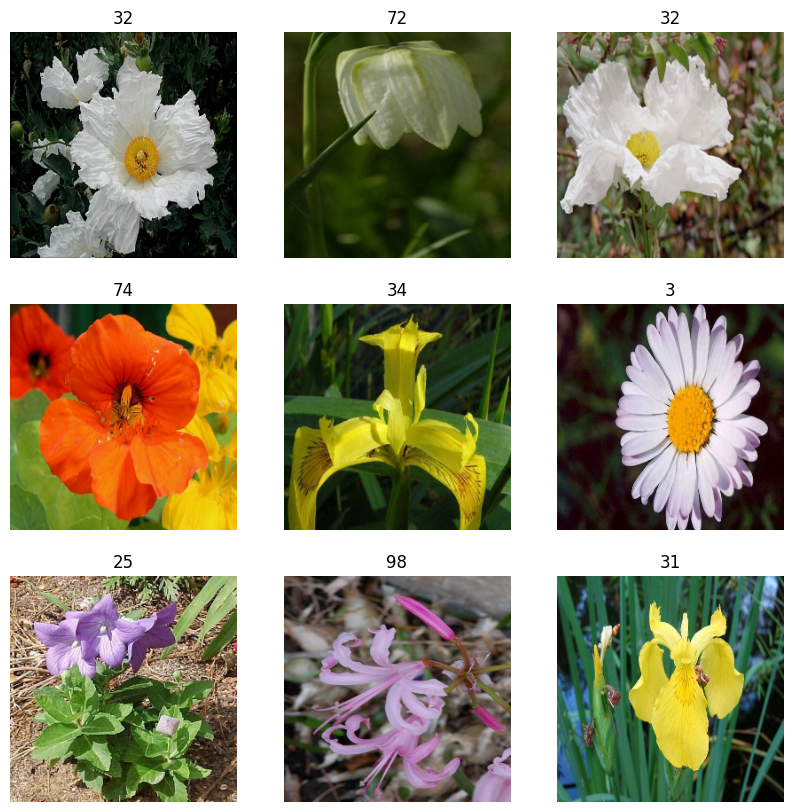

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[i].numpy())
    plt.axis("off")

In [5]:
# Convert the original labels to one-hot encoded format with 82 classes
num_classes = 82

train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

## Make the lfw-like dataset for testing

## Design the architecture of the model

In [19]:
num_classes = 82

In [7]:
resnet_50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


In [54]:
def build_model():
    inputs = tf.keras.Input(shape=train_ds.element_spec[0].shape[1:])
    x = resnet_50(inputs)
    features = layers.GlobalAveragePooling2D(name="features")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    return tf.keras.models.Model(inputs, [features, outputs])

## Train without center-loss

In [10]:
model = build_model()
model.compile(optimizer=optimizers.Adam(learning_rate = 0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 features (GlobalAveragePool  (None, 2048)             0         
 ing2D)                                                          
                                                                 
 dense (Dense)               (None, 82)                168018    
                                                                 
Total params: 23,755,730
Trainable params: 168,018
Non-trainable params: 23,587,712
_________________________________________________________________


In [51]:
history_no_centerloss = model.fit(train_ds, epochs = 10, batch_size = 32,
                      validation_data = val_ds)

Epoch 1/10
163/163 [==============================] - 35s 171ms/step - loss: 0.0874 - categorical_accuracy: 0.7539 - val_loss: 1.1190 - val_categorical_accuracy: 0.5120
Epoch 2/10
163/163 [==============================] - 37s 222ms/step - loss: 0.0806 - categorical_accuracy: 0.7576 - val_loss: 1.1563 - val_categorical_accuracy: 0.5050
Epoch 3/10
163/163 [==============================] - 32s 191ms/step - loss: 0.0853 - categorical_accuracy: 0.7572 - val_loss: 1.1594 - val_categorical_accuracy: 0.5073
Epoch 4/10
163/163 [==============================] - 28s 164ms/step - loss: 0.0777 - categorical_accuracy: 0.7617 - val_loss: 1.2028 - val_categorical_accuracy: 0.5081
Epoch 5/10
163/163 [==============================] - 28s 165ms/step - loss: 0.0783 - categorical_accuracy: 0.7605 - val_loss: 1.2176 - val_categorical_accuracy: 0.5004
Epoch 6/10
163/163 [==============================] - 27s 164ms/step - loss: 0.0747 - categorical_accuracy: 0.7615 - val_loss: 1.2706 - val_categorical_acc

In [53]:
model.save('/content/drive/MyDrive/dataset/without-centerloss.h5')

## Evaluate without center-loss

In [63]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/dataset/without-centerloss.h5')

In [66]:
# テストデータの中間表現を取得
feature_extractor = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('features').output)
features = feature_extractor.predict(val_ds)

print(features.shape)

ValueError: ignored

## Train with center-loss

In [57]:
class CenterLoss(losses.Loss):
    def __init__(self, num_classes, feature_dims, alpha = 0.5):
        super(CenterLoss, self).__init__()

        self.num_classes = num_classes
        self.feature_dims = feature_dims

        # hyper parameter for updating the center point
        self.alpha = alpha

        self.centers = tf.Variable(tf.zeros(shape = (self.num_classes, self.feature_dims)))

    def call(self, y_true, y_pred):
        """
            y_ture : same teacher signal as for classification (1-hot vector)
                     shape = (batch_size, num_classes)
            y_pred : output of features in the middle layer of the model
                     shape = (batch_size, feature_dims)
        """

        labels = tf.argmax(y_true, axis=-1)

        centers_batch = tf.gather(self.centers, labels)

        diff = centers_batch - y_pred

        loss = tf.reduce_mean(tf.square(diff))


        unique_label, unique_idx, unique_count = tf.unique_with_counts(labels)
        appear_times = tf.gather(unique_count, unique_idx)
        appear_times = tf.reshape(appear_times, [-1, 1])

        diff = diff / tf.cast((1 + appear_times), tf.float32)

        diff = self.alpha * diff

        self.centers = tf.compat.v1.scatter_sub(self.centers, labels, diff)

        return loss

In [58]:
num_classes = 82
feature_dims = 2048

In [59]:
model = build_model()
model.compile(optimizer=optimizers.Adam(learning_rate = 0.001),
              loss=[CenterLoss(num_classes, feature_dims),losses.CategoricalCrossentropy()],
              metrics=metrics.CategoricalAccuracy())
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 features (GlobalAveragePool  (None, 2048)             0         
 ing2D)                                                          
                                                                 
 dense_5 (Dense)             (None, 82)                168018    
                                                                 
Total params: 23,755,730
Trainable params: 168,018
Non-trainable params: 23,587,712
_________________________________________________________________


In [60]:
history_with_centerloss = model.fit(train_ds, epochs = 10, batch_size = 32,
                      validation_data = val_ds)

Epoch 1/10
163/163 [==============================] - 42s 233ms/step - loss: 2.0478 - features_loss: 0.3027 - dense_5_loss: 1.7451 - features_categorical_accuracy: 0.0089 - dense_5_categorical_accuracy: 0.3613 - val_loss: 1.3903 - val_features_loss: 0.2847 - val_dense_5_loss: 1.1056 - val_features_categorical_accuracy: 0.0085 - val_dense_5_categorical_accuracy: 0.4827
Epoch 2/10
163/163 [==============================] - 27s 162ms/step - loss: 0.9985 - features_loss: 0.2863 - dense_5_loss: 0.7123 - features_categorical_accuracy: 0.0089 - dense_5_categorical_accuracy: 0.5817 - val_loss: 1.2132 - val_features_loss: 0.2842 - val_dense_5_loss: 0.9290 - val_features_categorical_accuracy: 0.0085 - val_dense_5_categorical_accuracy: 0.5096
Epoch 3/10
163/163 [==============================] - 28s 169ms/step - loss: 0.7461 - features_loss: 0.2869 - dense_5_loss: 0.4591 - features_categorical_accuracy: 0.0089 - dense_5_categorical_accuracy: 0.6428 - val_loss: 1.1304 - val_features_loss: 0.2845 -

In [61]:
model.save('/content/drive/MyDrive/dataset/with-centerloss.h5')

## Evaluate with center-loss